# ARIMA

In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv("./data/Sept11Travel.csv")
data.head(5)

Month       Air       Rail    Road
0  Jan-90  35153577  454115779  163.28
1  Feb-90  32965187  435086002  153.25
2  Mar-90  39993913  568289732  178.42
3  Apr-90  37981886  568101697  178.68
4  May-90  38419672  539628385  188.88

In [6]:
#Create a date range for the dataset
dates = pd.date_range(start='1990-01-01', freq='MS', periods=len(data))
dates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', length=168, freq='MS')

In [7]:
#Create a new column for month and use the month from the created date range
import calendar
data['Mon'] = dates.month
data.head()

Month       Air       Rail    Road  Mon
0  Jan-90  35153577  454115779  163.28    1
1  Feb-90  32965187  435086002  153.25    2
2  Mar-90  39993913  568289732  178.42    3
3  Apr-90  37981886  568101697  178.68    4
4  May-90  38419672  539628385  188.88    5

In [8]:
#Rename the numbers in the Month column to calendar months
data['Mon'] = data['Mon'].apply(lambda x: calendar.month_abbr[x])
data['Mon'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Mon, dtype: object

In [9]:
#Create a new column for year and use the year from the created date range
data['Year'] = dates.year
data['Year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: Year, dtype: int64

In [10]:
data.drop(['Month'], axis=1, inplace=True)
data.head()

Air       Rail    Road  Mon  Year
0  35153577  454115779  163.28  Jan  1990
1  32965187  435086002  153.25  Feb  1990
2  39993913  568289732  178.42  Mar  1990
3  37981886  568101697  178.68  Apr  1990
4  38419672  539628385  188.88  May  1990

In [11]:
data = data[['Mon', 'Year', 'Road']]

In [12]:
data.set_index(dates, inplace=True)

In [13]:
data.head(5)

Mon  Year    Road
1990-01-01  Jan  1990  163.28
1990-02-01  Feb  1990  153.25
1990-03-01  Mar  1990  178.42
1990-04-01  Apr  1990  178.68
1990-05-01  May  1990  188.88

In [14]:
# extract out the time-series
Road_ts = data['Road']

Text(0, 0.5, 'Road')

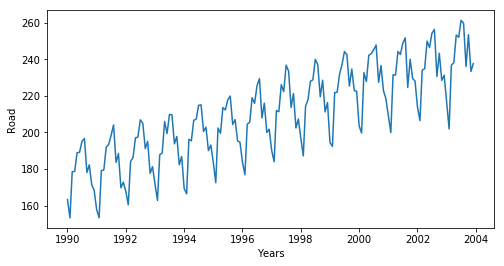

In [15]:
#Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(Road_ts)
plt.xlabel('Years')
plt.ylabel('Road')

# EDA to detect stationarity
## Creating subplots with 4,6,8, and 12 month moving average

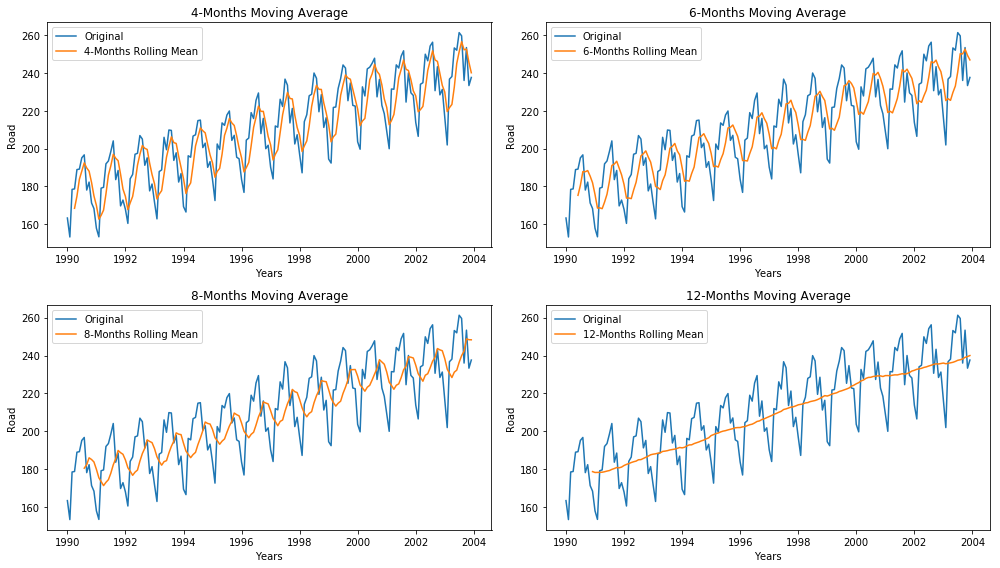

In [16]:
#Creating the subplot placeholders
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
axes[0][0].plot(Road_ts.index, Road_ts, label='Original')
axes[0][0].plot(Road_ts.index, Road_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Road")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

#6 month MA
axes[0][1].plot(Road_ts.index, Road_ts, label='Original')
axes[0][1].plot(Road_ts.index, Road_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Road")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

#8 month MA
axes[1][0].plot(Road_ts.index, Road_ts, label='Original')
axes[1][0].plot(Road_ts.index, Road_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Road")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

#12 month MA
axes[1][1].plot(Road_ts.index, Road_ts, label='Original')
axes[1][1].plot(Road_ts.index, Road_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Road")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


In [17]:
#Determing rolling statistics
rolmean = Road_ts.rolling(window=12).mean()
rolstd = Road_ts.rolling(window=12).std()
print(rolmean[1:20])
print(rolstd[1:20])

1990-02-01           NaN
1990-03-01           NaN
1990-04-01           NaN
1990-05-01           NaN
1990-06-01           NaN
1990-07-01           NaN
1990-08-01           NaN
1990-09-01           NaN
1990-10-01           NaN
1990-11-01           NaN
1990-12-01    178.607500
1991-01-01    178.157500
1991-02-01    178.165000
1991-03-01    178.218333
1991-04-01    178.288333
1991-05-01    178.540833
1991-06-01    178.898333
1991-07-01    179.171667
1991-08-01    179.786667
Freq: MS, Name: Road, dtype: float64
1990-02-01          NaN
1990-03-01          NaN
1990-04-01          NaN
1990-05-01          NaN
1990-06-01          NaN
1990-07-01          NaN
1990-08-01          NaN
1990-09-01          NaN
1990-10-01          NaN
1990-11-01          NaN
1990-12-01    13.029208
1991-01-01    13.683533
1991-02-01    13.668657
1991-03-01    13.670990
1991-04-01    13.675719
1991-05-01    13.914935
1991-06-01    14.263311
1991-07-01    14.628557
1991-08-01    15.556766
Freq: MS, Name: Road, dtype: flo

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

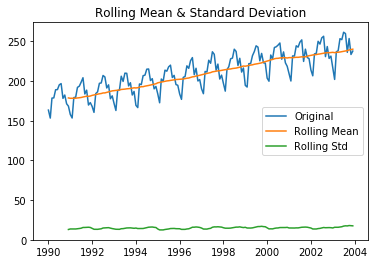

In [18]:
#Plot rolling statistics:
orig = plt.plot(Road_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

#### Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dftest = adfuller(Road_ts)
dftest

(-1.06515046611397,
 0.7287675964165247,
 14,
 153,
 {'1%': -3.473829775724492,
  '5%': -2.880622899711496,
  '10%': -2.5769448985432954},
 773.2461947104315)

Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

### Seasonality – Time Series Decomposition

Observe how number of tractors sold vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

#### There is a clear seasonality in the data with peak Road noticed in July/August and lowest Road in the beginning of the year

#### Inferences

1. The tractor Road have been increasing without fail every year.
2. July and August are the peak months for tractor Road and the variance and the mean value in July and August are also much higher than any of the other months.
3. We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

### Time Series Decomposition

In [21]:
#Multiplicative decomposition of the series
decomposition = sm.tsa.seasonal_decompose(Road_ts, model='multiplicative')

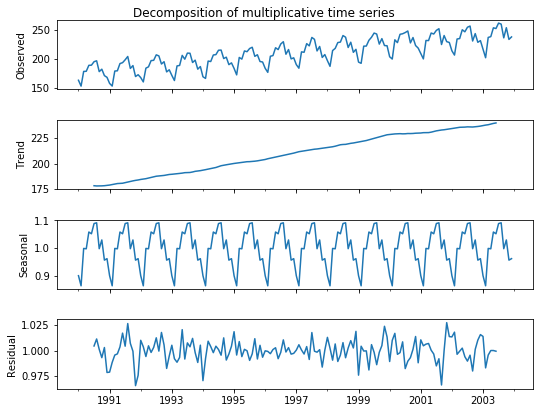

In [22]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

### Some of our key observations from this analysis:

1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.

2) Seasonality: Seasonal plot displays a fRoadly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

Seasonality_t × Remainder_t = Y_t/Trend_t
 
3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

Remainder_t = Y_t / (Trend_t × Seasonality_t)

Text(0, 0.5, 'Tractor Road')

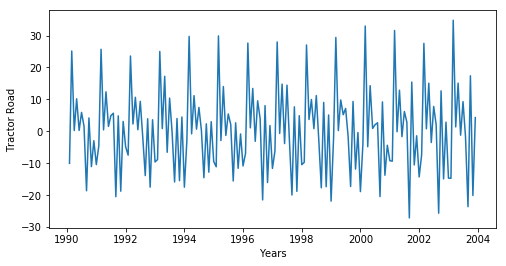

In [23]:
#Differencing once to remove trend
plt.figure(figsize=(8, 4))
plt.plot(Road_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Road')

#### Although the trend is removed after differencing, there is unequal variance which implies that the series is not stationary. We will apply differencing to the log of the series to see if it helps remove the unequal variance

Text(0, 0.5, 'Log (Tractor Road)')

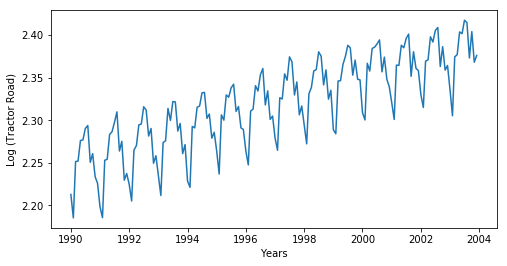

In [24]:
#Log of time series
plt.figure(figsize=(8, 4))
plt.plot(np.log10(Road_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Road)')

Text(0, 0.5, 'Differenced Log (Tractor Road)')

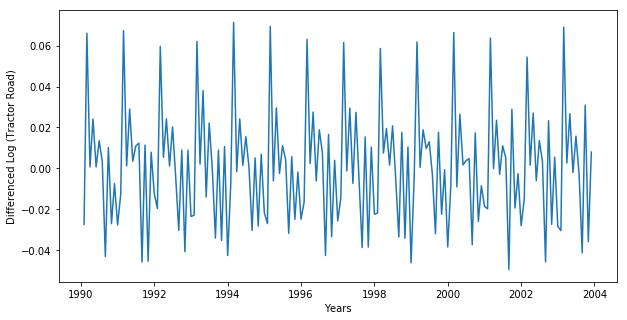

In [25]:
#Difference of log
plt.figure(figsize=(10, 5))
plt.plot(np.log10(Road_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Road)')

In [26]:
#### The series now has a constant mean as well as constant variance

In [27]:
#Log of the time series
Road_ts_log = np.log10(Road_ts)
Road_ts_log.dropna(inplace=True)

#Diff of the log
Road_ts_log_diff = Road_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
Road_ts_log_diff.dropna(inplace=True)

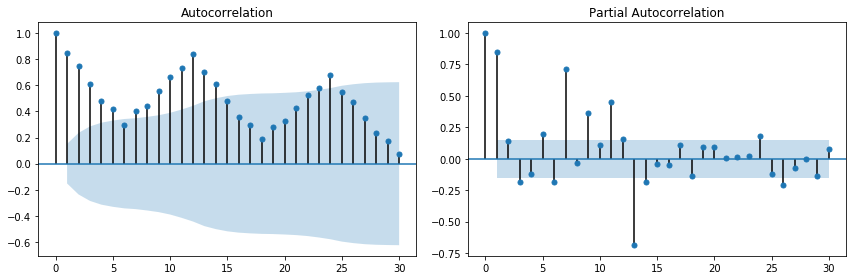

In [28]:
##ACF and PACF plots of the log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(Road_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(Road_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

#### The ACF plot with significant consecutive lags shows there is a trend in the series - that is every observation is correlated with many of its past observations

#### The PACF plot with significant lags at 6 and 12 are an indication of seasonality

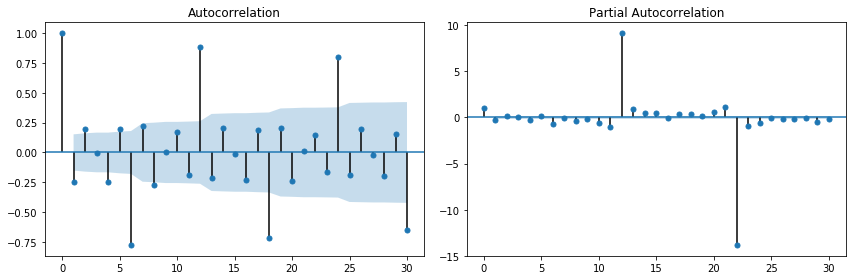

In [29]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(Road_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(Road_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

#### The differencing has removed the trend in the series, as seen by the ACF and PACF plots. 
#### However, significant lag 6 and 12 indicate that seasonality may still be present in the data


In [30]:
# Create a diff of 12 on the log series
#Diff of the log
Road_ts_log_diff12 = Road_ts_log.diff(periods=12) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
Road_ts_log_diff12.dropna(inplace=True)

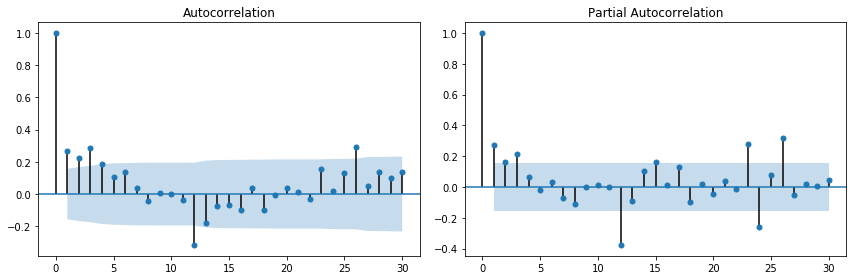

In [70]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(Road_ts_log_diff12, lags=30, ax=axes[0])
smt.graphics.plot_pacf(Road_ts_log_diff12, lags=30, ax=axes[1])
plt.tight_layout()

In [32]:
dftest = adfuller(Road_ts_log_diff)
dftest

(-3.9650380707870703,
 0.0016050626648515345,
 14,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 -1096.6390233121165)

In [33]:
# Diff of log series is marginally significant - series is still not stationary

In [34]:
dftest12 = adfuller(Road_ts_log_diff12)
dftest12

(-4.727435420191568,
 7.471355656241581e-05,
 11,
 144,
 {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085},
 -1039.274195018055)

In [35]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [36]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [37]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [38]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [39]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [40]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2001-08-01']
test = data[data.index >= '2001-08-01']
train_Road_ts_log = np.log10(train['Road'])

In [41]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [42]:
for param in pdq:
    for param_seasonal in seasonal_pdq:      
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_Road_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()
            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retva

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-976.2326035857828


The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

Akaike Information Criterion (AIC) - AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model. This is similar to the balancing act between income and cost of a company so that the debs of the company is optimized (Debt = Cost - Income). As a modeler, we care about the maximum goodness of fit (income) with the minimum number of parameters (cost).

AIC=2K−2ln(L) 

For the given model, L in the above formula is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. Like our debts, we want to keep AIC value at the minimum to choose the best possible model. Bayesian Information Criterion (BIC) is another variant of AIC and is used for the same purpose of best fit model selection. For the best possible model selection, we want to look at AIC, BIC, and AICc (AIC with sample correction) if all these values are minimum for a given model. With increasing parameters K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

As expected, our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. Moreover, the best fit model has MA value of order 1. Also, there is seasonal MA with lag 12 of order 1.

## comparing our model with a random order model

In [66]:
param_order = (1, 1, 1)
param_seasonal_order = (1, 0, 1, 12)

In [67]:
model = sm.tsa.statespace.SARIMAX(Road_ts_log, order=param_order, 
                                  seasonal_order=param_seasonal_order,enforce_stationarity=True)

In [68]:
results = model.fit()

In [69]:
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 model - AIC:-1191.0608042893623


## Predict Road on in-sample date using the best fit ARIMA model

In [47]:
best_model = sm.tsa.statespace.SARIMAX(train_Road_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\DELL\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [48]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                               Road   No. Observations:                  139
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 492.116
Date:                            Wed, 24 Apr 2019   AIC                           -976.233
Time:                                    16:01:42   BIC                           -964.524
Sample:                                01-01-1990   HQIC                          -971.474
                                     - 07-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6985      0.064    -10.852      0.000      -0.825      -0.572
ar.S.L12       0.9950      0.004   

# comparing our model with a random order model

In [49]:
param_order = (0, 1, 1)
param_seasonal_order = (0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_Road_ts_log, order=param_order, 
                                  seasonal_order=param_seasonal_order,enforce_stationarity=True)
results = model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-932.6288826078661


In [50]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)
test

Mon  Year    Road       date
2001-08-01  Aug  2001  251.69 2001-08-01
2001-09-01  Sep  2001  224.57 2001-09-01
2001-10-01  Oct  2001  240.00 2001-10-01
2001-11-01  Nov  2001  229.48 2001-11-01
2001-12-01  Dec  2001  228.09 2001-12-01
2002-01-01  Jan  2002  213.81 2002-01-01
2002-02-01  Feb  2002  206.46 2002-02-01
2002-03-01  Mar  2002  234.01 2002-03-01
2002-04-01  Apr  2002  234.81 2002-04-01
2002-05-01  May  2002  249.89 2002-05-01
2002-06-01  Jun  2002  246.39 2002-06-01
2002-07-01  Jul  2002  254.19 2002-07-01
2002-08-01  Aug  2002  256.24 2002-08-01
2002-09-01  Sep  2002  230.60 2002-09-01
2002-10-01  Oct  2002  243.29 2002-10-01
2002-11-01  Nov  2002  228.39 2002-11-01
2002-12-01  Dec  2002  231.26 2002-12-01
2003-01-01  Jan  2003  216.60 2003-01-01
2003-02-01  Feb  2003  201.90 2003-02-01
2003-03-01  Mar  2003  236.70 2003-03-01
2003-04-01  Apr  2003  238.10 2003-04-01
2003-05-01  May  2003  253.20 2003-05-01
2003-06-01  Jun  2003  252.00 2003-06-01
2003-07-01  Jul  2003  261.30 2003-07-01
2003-08-01  Aug  2003  259.60 2003-08-01
2003-09-01  Sep  2003  236.00 2003-09-01
2003-10-01  Oct  2003  253.40 2003-10-01
2003-11-01  Nov  2003  233.30 2003-11-01
2003-12-01  Dec  2003  237.60 2003-12-01

In [51]:
# Extract the predicted and true values of our time series
testCopy = test.copy()
testCopy['Road_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [52]:
testCopy

Mon  Year    Road       date  Road_ts_forecasted
2001-08-01  Aug  2001  251.69 2001-08-01          250.561175
2001-09-01  Sep  2001  224.57 2001-09-01          231.025174
2001-10-01  Oct  2001  240.00 2001-10-01          239.967540
2001-11-01  Nov  2001  229.48 2001-11-01          225.295208
2001-12-01  Dec  2001  228.09 2001-12-01          224.539832
2002-01-01  Jan  2002  213.81 2002-01-01          210.531502
2002-02-01  Feb  2002  206.46 2002-02-01          203.535281
2002-03-01  Mar  2002  234.01 2002-03-01          235.322956
2002-04-01  Apr  2002  234.81 2002-04-01          234.363802
2002-05-01  May  2002  249.89 2002-05-01          247.402394
2002-06-01  Jun  2002  246.39 2002-06-01          247.391087
2002-07-01  Jul  2002  254.19 2002-07-01          253.755281
2002-08-01  Aug  2002  256.24 2002-08-01          254.773930
2002-09-01  Sep  2002  230.60 2002-09-01          235.005146
2002-10-01  Oct  2002  243.29 2002-10-01          244.055065
2002-11-01  Nov  2002  228.39 2002-11-01          229.205344
2002-12-01  Dec  2002  231.26 2002-12-01          228.440706
2003-01-01  Jan  2003  216.60 2003-01-01          214.258242
2003-02-01  Feb  2003  201.90 2003-02-01          207.173298
2003-03-01  Mar  2003  236.70 2003-03-01          239.354835
2003-04-01  Apr  2003  238.10 2003-04-01          238.384132
2003-05-01  May  2003  253.20 2003-05-01          251.578051
2003-06-01  Jun  2003  252.00 2003-06-01          251.566611
2003-07-01  Jul  2003  261.30 2003-07-01          258.005344
2003-08-01  Aug  2003  259.60 2003-08-01                 NaN
2003-09-01  Sep  2003  236.00 2003-09-01                 NaN
2003-10-01  Oct  2003  253.40 2003-10-01                 NaN
2003-11-01  Nov  2003  233.30 2003-11-01                 NaN
2003-12-01  Dec  2003  237.60 2003-12-01                 NaN

In [53]:
# Compute the root mean square error
mse = ((testCopy['Road'] - testCopy['Road_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 2.788


In [54]:
# Compute the MAPE 
abs_error = np.abs(testCopy['Road'] - testCopy['Road_ts_forecasted'])
actual = testCopy['Road']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.01

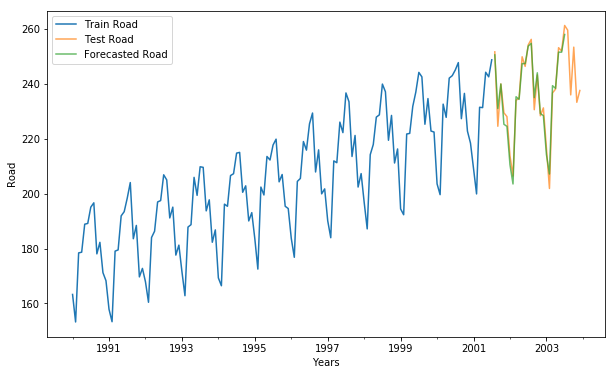

In [55]:
axis = train['Road'].plot(label='Train Road', figsize=(10, 6))
testCopy['Road'].plot(ax=axis, label='Test Road', alpha=0.7)
testCopy['Road_ts_forecasted'].plot(ax=axis, label='Forecasted Road', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Road')
plt.legend(loc='best')
plt.show()
plt.close()

### Forecast Road using the best fit ARIMA model

In [56]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

In [57]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [58]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')

In [59]:
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

In [60]:
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [61]:
fc_all = fc_95.combine_first(fc_99)

In [62]:
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # reordering columns

In [63]:
fc_all.head()

forecast  lower_ci_95  upper_ci_95  lower_ci_99  upper_ci_99
2003-12-01  250.561175   243.946552   257.355154   243.946552   257.355154
2004-01-01  231.025174   224.658971   237.571777   224.658971   237.571777
2004-02-01  239.967540   233.088910   247.049164   233.088910   247.049164
2004-03-01  225.295208   218.597114   232.198541   218.597114   232.198541
2004-04-01  224.539832   217.633604   231.665216   217.633604   231.665216

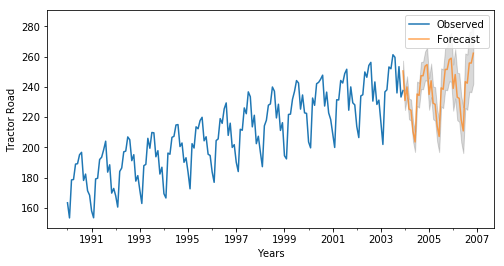

In [64]:
# plot the forecast along with the confidence band
axis = Road_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Road')
plt.legend(loc='best')
plt.show()

### Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

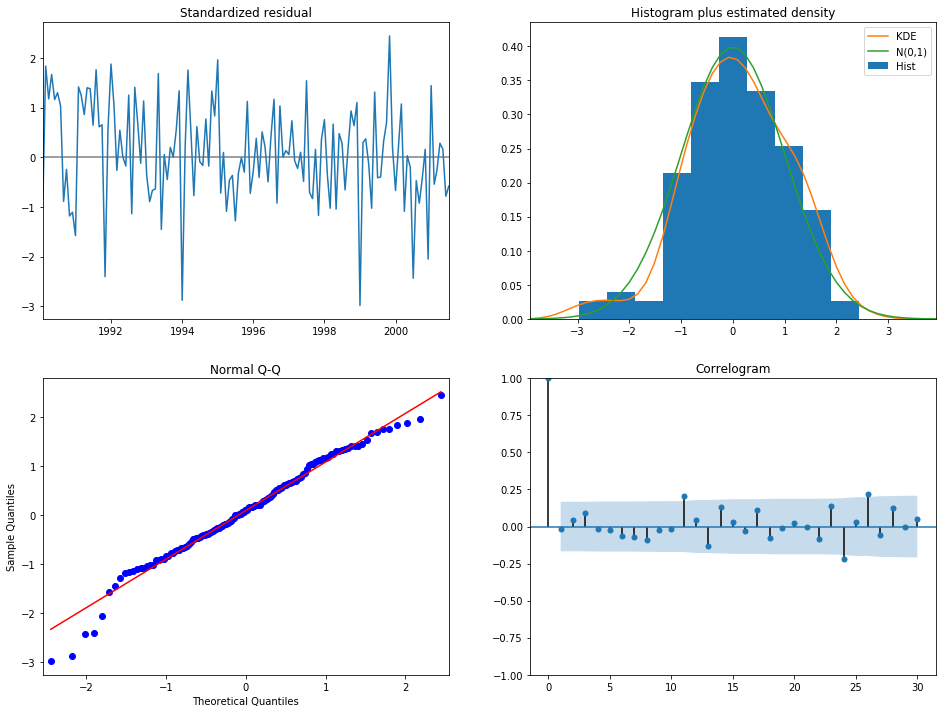

In [65]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.